# Colored ROC Curves

The Receiver Operating Characteristic (ROC) curve is helpful in evaluating model performance, especially since Area Under the Curve (AUC ROC) has a several friendly interpretations. I use ROC curves in evaluating models and have to explain the output to non-technical folks. I was reading through [Machine Learning: The Art and Science of Algorithms that Make Sense of Data](http://a.co/dnKG3eO) and stumbled upon this nice visual and interpretation of ROC (tied to AUC):

![png](https://i.imgur.com/nWXd3Q0.png)

>Flach, P. (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

The interpretation that each cell is a pair of true and false outcomes and their scores doesn't always map to reality -- usually you have more than 100 pairs and in imbalanced dataset -- but in general it helps me imagine model performance and explain to someone what the curve means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

%matplotlib inline

## Load Data
From the digits dataset we'll try to predict if a digit is `4` 

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

y = y == 4

## Build Model
We're making a purposefully bad model so the ROC curve is more interesting. Then building the ROC curve from predictions on a test set.

In [3]:
dt = DecisionTreeClassifier(max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

probas_ = dt.fit(X_train, y_train).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

## Build Coloring Matrix
We'll create a `100x100` matrix and color each chunk of cells according to the coordinates given by `FPR` and `TPR`

In [4]:
coordlist = list(zip(((fpr * 100).astype(int)), ((tpr * 100).astype(int))))

roc_array = np.zeros((100,100))

for i, coords in enumerate(coordlist):
    if i == len(coordlist) - 1:
        continue
    else:
        # orange
        roc_array[coords[0]:coordlist[i+1][0], coords[1]:coordlist[i+1][1]] = 0
        # red
        roc_array[coords[0]:coordlist[i+1][0], coordlist[i+1][1]:100] = -1
        # green
        roc_array[coords[0]:100, 0:coords[1]] = 1

## Plot Colored Matrix & ROC Curve
There is still a small issue of the colors not exactly lining up with the gridlines.

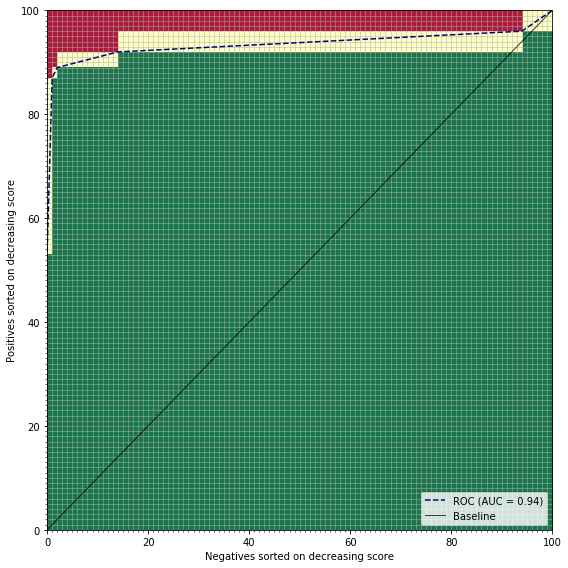

In [5]:
fig = plt.figure(figsize=(8,8))

# ROC Curve
plt.plot((fpr * 100).astype(int), (tpr * 100).astype(int),
         lw=1.5, linestyle='--', color='navy',
         label='ROC (AUC = %0.2f)' % (roc_auc))

# Dummy Model
plt.plot([0.0, 100.0], [0.0, 100.0],
         linestyle='-', lw=1, color='k', alpha=0.75,
         label='Baseline')

# ROC Color Matrix
plt.imshow(roc_array.T, 
           cmap=plt.cm.RdYlGn, alpha=0.9, origin='lower',
           aspect='auto', interpolation='nearest', extent=[0.0, 100.0, 0.0, 100.0])
plt.legend(loc="lower right")

# adding the lines to the chart automatically extends the axis by (-20, -20)
ax = fig.axes[0]
ax.set_xlim([0,100])
ax.set_ylim([0,100])

# axis labels
plt.xlabel('Negatives sorted on decreasing score')
plt.ylabel('Positives sorted on decreasing score')

# minor ticks each unit
minor_ticks = np.arange(0, 100, 1)                                               
ax.set_xticks(minor_ticks, minor=True)                                                                                                 
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.6, linestyle='-')

# tight_layout for figures sometimes getting cutoff
plt.tight_layout()
plt.savefig('roc_colored.png')

## Relevant `matplotlib` StackOverflow Posts
- [matching axis in imshow](http://stackoverflow.com/questions/12324176/matplotlib-imshow-offset-to-match-axis)
- [limiting y-axis](http://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib)
- [specifing minor axis grid aesthetics](http://stackoverflow.com/questions/24943991/matplotlib-change-grid-interval-and-specify-tick-labels)